Prvo uključujemo potrebne biblioteke, ili pak njihove dijelove. Osnovna biblioteka koju ćemo koristiti jest ```sklearn```, odlična Python biblioteka za strojno učenje. Dodatno ćemo za vizualizaciju koristiti ```matplotlib```.

In [97]:
%pylab inline
import sys
sys.path.append('/Library/Python/2.7/site-packages/')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Sljedeće učitavamo podatke iz naše ```reldi2.tsv``` datoteke. Za zavisnu varijablu ```y``` proglašavamo korpus, dakle ```hrwac``` ili ```srwac```, dok su nam nezavisne varijable preostale varijable u podatkovnom skupu. Od instanci iz korpusa srWaC uzimamo samo one pisane latinicom, dok one pisane ćirilicom ovdje zanemarujemo.

In [98]:
X=[]
y=[]
varijable=open('reldi2.tsv').readline().strip().split('\t')[2:]
for line in open('reldi2.tsv').readlines()[1:]:
  line=line.strip().split('\t')
  if not line[1].endswith('cyr'):
    y.append(line[1][:2])
    X.append([float(e) for e in line[2:]])
print y[:5]
print X[:5]

['hr', 'hr', 'hr', 'hr', 'hr']
[[897.0, 4.78929765886, 0.051724137931, 0.0, 1.67224080268e-06, 0.501075268817, 1.0], [1174.0, 5.26235093697, 0.137440758294, 0.333333333333, 7.6660988075e-07, 0.620503597122, 2.0], [402.0, 5.38308457711, 0.136363636364, 0.0, 0.0, 0.752808988764, 3.0], [523.0, 4.25621414914, 0.036036036036, 0.0, 1.9120458891e-06, 0.564705882353, 1.0], [1103.0, 5.46872166818, 0.0484848484848, 0.666666666667, 6.34632819583e-07, 0.723154362416, 3.0]]


Sljedeće što radimo jest da dijelimo svoj skup podataka na skup za učenje (90% instanci) te skup za provjeru (10% instanci). Potom učimo klasifikacijski model logističke regresije na podacima za učenje te ispisujemo koeficijente modela. Koeficijenti modela nam govore koliko je pojedina varijabla važna za klasifikacijski proces te 

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
clf=Pipeline([('scl',StandardScaler()),('clf',LogisticRegression())])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print '###točnost###'
print accuracy_score(y_test,y_pred)
print '###klasifikacijski izvještaj###'
print classification_report(y_test,y_pred)
print '###matrica zabune###'
print confusion_matrix(y_test,y_pred)

###točnost###
0.91
###klasifikacijski izvještaj###
             precision    recall  f1-score   support

         hr       0.85      0.95      0.90        42
         sr       0.96      0.88      0.92        58

avg / total       0.92      0.91      0.91       100

###matrica zabune###
[[40  2]
 [ 7 51]]


In [128]:
y_pred=cross_val_predict(clf,X,y,cv=10)
print '###točnost###'
print accuracy_score(y,y_pred)
print '###klasifikacijski izvještaj###'
print classification_report(y,y_pred)
print '###matrica zabune###'
print confusion_matrix(y,y_pred)

###točnost###
0.858
###klasifikacijski izvještaj###
             precision    recall  f1-score   support

         hr       0.85      0.87      0.86       500
         sr       0.87      0.85      0.86       500

avg / total       0.86      0.86      0.86      1000

###matrica zabune###
[[434  66]
 [ 76 424]]


Postavlja se pitanje kakve bi rezultate postigli da nismo upotrijebili strojno učenje, već odluke donosili nasumično. Zato u strojnom učenju postoji koncept slabog polaznog modela (eng. <i>weak baseline system</i>). U nastavku prikazujemo rezultate onime koji generira nasumični izlaz.

In [100]:
dclf=DummyClassifier()
y_pred=cross_val_predict(dclf,X,y,cv=10)
print '###točnost###'
print accuracy_score(y,y_pred)
print '###klasifikacijski izvještaj###'
print classification_report(y,y_pred)
print '###matrica zabune###'
print confusion_matrix(y,y_pred)

###točnost###
0.494
###klasifikacijski izvještaj###
             precision    recall  f1-score   support

         hr       0.49      0.48      0.49       500
         sr       0.49      0.51      0.50       500

avg / total       0.49      0.49      0.49      1000

###matrica zabune###
[[241 259]
 [247 253]]


Vizualizirajmo dvije nezavisne varijable u koordinatnom prostoru. Vrijednost zavisne varijable zakodirat ćemo bojom.

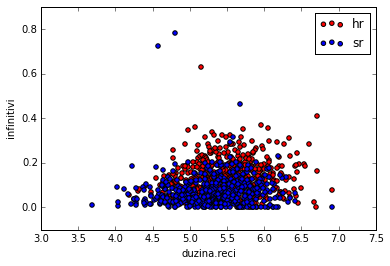

In [109]:
X2D=np.array(X)[:,[1,2]]
y=np.array(y)
colors=[('hr','red'),('sr','blue')]
for cl,co in colors:
    px = X2D[:,0][y==cl]
    py = X2D[:,1][y==cl]
    plt.scatter(px,py,c=co)

plt.legend([e[0] for e in colors])
plt.xlabel('duzina.reci')
plt.ylabel('infinitivi')

Pokrenimo klasifikacijski postupak unakrsnom validacijom na tom

In [106]:
y_pred=cross_val_predict(clf,X2D,y,cv=10)
print '###točnost###'
print accuracy_score(y,y_pred)
print '###klasifikacijski izvještaj###'
print classification_report(y,y_pred)
print '###matrica zabune###'
print confusion_matrix(y,y_pred)

###točnost###
0.696
###klasifikacijski izvještaj###
             precision    recall  f1-score   support

         hr       0.71      0.65      0.68       500
         sr       0.68      0.74      0.71       500

avg / total       0.70      0.70      0.70      1000

###matrica zabune###
[[326 174]
 [130 370]]


Pogledajmo za kraj kakav bi rezultat dobili nasumičnim procesom.

In [107]:
y_pred=cross_val_predict(dclf,X2D,y,cv=10)
print '###točnost###'
print accuracy_score(y,y_pred)
print '###klasifikacijski izvještaj###'
print classification_report(y,y_pred)
print '###matrica zabune###'
print confusion_matrix(y,y_pred)

###točnost###
0.509
###klasifikacijski izvještaj###
             precision    recall  f1-score   support

         hr       0.51      0.51      0.51       500
         sr       0.51      0.51      0.51       500

avg / total       0.51      0.51      0.51      1000

###matrica zabune###
[[256 244]
 [247 253]]
